In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"Crash_Reporting_-_Drivers_Data_20240105.csv", low_memory=False) 

In [4]:
df.shape

(172004, 43)

In [5]:
pd.set_option('display.max_columns', None)
df.head(5)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,NaN,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,E7058A8E-4F18-4D2A-954E-04A099CFED12,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,1C3C3E2F-9A23-4ED0-9BB3-B6C370D99C37,DISABLING,THREE OCLOCK,TWO OCLOCK,PASSENGER CAR,MAKING LEFT TURN,East,South,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,2B404D6D-8DB5-4CB6-9E71-9F1B8D0A8925,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,0483CE47-E0FC-4BCA-BAB0-B7541820FEE6,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PICKUP TRUCK,ACCELERATING,North,North,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,637D8107-0381-4B8D-848A-B4A93B4D53CE,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,4406AA84-07F8-45F4-88A2-09AD89AC9AAF,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,STARTING FROM LANE,East,East,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,NaN,NaN,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,52F904CB-822C-4D8D-9457-0D66B99AD407,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,CA,148FAA0F-4EBB-43E8-9339-BBED3F245751,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,West,North,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"


In [6]:
df.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude
count,172004.000000,172004.000000,172004.000000,172004.000000
mean,32.550493,1966.337917,39.083108,-77.112339
std,11.059175,340.548641,0.072031,0.098565
min,0.000000,0.000000,37.720000,-79.486000
25%,25.000000,2006.000000,39.024414,-77.189300
50%,35.000000,2011.000000,39.074923,-77.105412
75%,40.000000,2015.000000,39.139717,-77.039605
max,75.000000,9999.000000,39.990414,-75.527708


In [7]:
categorical = df.dtypes[df.dtypes == "object"].index

df[categorical].describe()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Driverless Vehicle,Parked Vehicle,Vehicle Make,Vehicle Model,Equipment Problems,Location
count,172004,172004,172004,172004,172004,155043,156079,155010,156065,15923,19109,5459,171419,158662,151902,170559,146551,140695,4314,172004,172004,172004,31335,172004,162064,172004,171688,171848,171748,169359,171620,169318,169318,172004,172004,171980,171938,137877,172004
unique,96792,96690,10,3,94440,10,3801,10,6696,11294,20,12,18,12,11,8,11,11,15,172004,3,5,198,19,74,172004,7,16,16,30,22,5,5,2,2,1877,6687,10,95949
top,MCP229800RC,200022715,Montgomery County Police,Property Damage Crash,12/10/2018 06:10:00 PM,Maryland (State),GEORGIA AVE,County,GEORGIA AVE,PARKING LOT,ROCKVILLE,PEDESTRIAN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NONE DETECTED,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,"RAIN, SNOW, WET",NOT DISTRACTED,MD,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,North,No,No,TOYOTA,4S,NO MISUSE,"(38.953, -77.338)"
freq,10,10,138276,109377,11,77025,10859,85490,2106,132,9316,3878,55714,116719,120507,116089,68582,122462,3858,1,92405,141096,12160,106648,142761,1,62327,67976,67720,119026,67186,46822,47621,171266,169318,23156,13741,123386,45


# Dropping Columns

In [40]:
columns_to_drop = ['Off-Road Description' , 'Municipality' , 'Related Non-Motorist' , 'Non-Motorist Substance Abuse' , 'Circumstance' , 'Road Name' , 'Cross-Street Name']


In [41]:
df.drop(columns_to_drop, axis=1, inplace=True)

# Data Explortary

## Collision Analysis

In [42]:
df.groupby('Collision Type')['Person ID'].agg(['nunique']).sort_values(by='nunique', ascending=False)

,nunique
Collision Type,
SAME DIR REAR END,55714
STRAIGHT MOVEMENT ANGLE,30328
OTHER,19017
SAME DIRECTION SIDESWIPE,16217
SINGLE VEHICLE,15859
HEAD ON LEFT TURN,12922
SAME DIRECTION RIGHT TURN,3828
HEAD ON,3785
SAME DIRECTION LEFT TURN,3715


In [43]:
df.groupby(['Vehicle Going Dir','Vehicle Continuing Dir'])['Person ID'].agg(['count']).sort_values('count',ascending=False)

,,count
Vehicle Going Dir,Vehicle Continuing Dir,
North,North,39800
South,South,38727
East,East,28459
West,West,27568
Unknown,Unknown,4909
South,East,4699
North,West,4441
West,South,4244
East,North,4009


In [44]:
df.groupby('Weather')['Report Number'].agg(['nunique']).sort_values(by='nunique', ascending=False)

,nunique
Weather,
CLEAR,65126
RAINING,11625
CLOUDY,9574
SNOW,870
UNKNOWN,581
FOGGY,425
WINTRY MIX,247
OTHER,210
SLEET,130


In [45]:
df.groupby('Surface Condition')['Report Number'].agg(['nunique']).sort_values(by='nunique', ascending=False)

,nunique
Surface Condition,
DRY,64689
WET,15793
ICE,679
SNOW,598
UNKNOWN,388
SLUSH,132
OTHER,99
"MUD, DIRT, GRAVEL",36
WATER(STANDING/MOVING),30


In [46]:
df.groupby('Light')['Report Number'].agg(['nunique']).sort_values(by='nunique', ascending=False)

,nunique
Light,
DAYLIGHT,62890
DARK LIGHTS ON,23576
DARK NO LIGHTS,3464
DUSK,2171
DAWN,1993
DARK -- UNKNOWN LIGHTING,1090
UNKNOWN,590
OTHER,218


In [47]:
df.groupby('Traffic Control')['Report Number'].agg(['nunique']).sort_values(by='nunique', ascending=False)

,nunique
Traffic Control,
NO CONTROLS,41315
TRAFFIC SIGNAL,28964
STOP SIGN,6647
FLASHING TRAFFIC SIGNAL,1135
OTHER,1134
YIELD SIGN,910
UNKNOWN,205
PERSON,164
WARNING SIGN,112


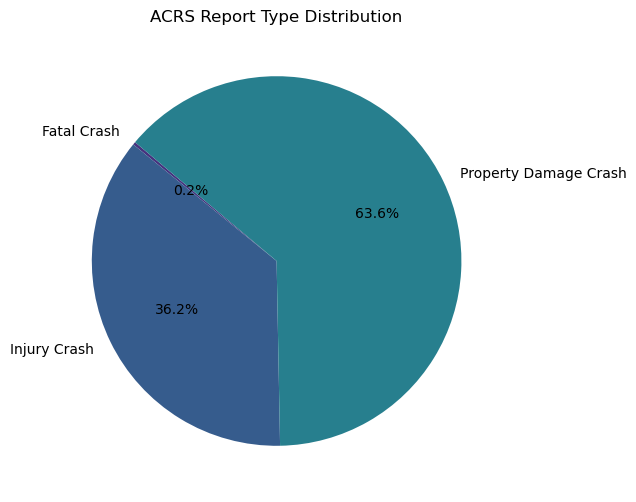

In [48]:
to_visualize = df.groupby('ACRS Report Type')['Person ID'].agg(['nunique'])

plt.figure(figsize=(6, 6))

plt.pie(to_visualize['nunique'], labels=to_visualize.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))

plt.title('ACRS Report Type Distribution')
plt.show()

## Driver Analysis

In [49]:
df.groupby('Driver Substance Abuse')['Person ID'].agg(['nunique']).sort_values(by='nunique', ascending=False)

,nunique
Driver Substance Abuse,
NONE DETECTED,122462
UNKNOWN,11987
ALCOHOL PRESENT,4080
ALCOHOL CONTRIBUTED,1431
ILLEGAL DRUG PRESENT,257
MEDICATION PRESENT,117
ILLEGAL DRUG CONTRIBUTED,102
COMBINED SUBSTANCE PRESENT,91
MEDICATION CONTRIBUTED,64


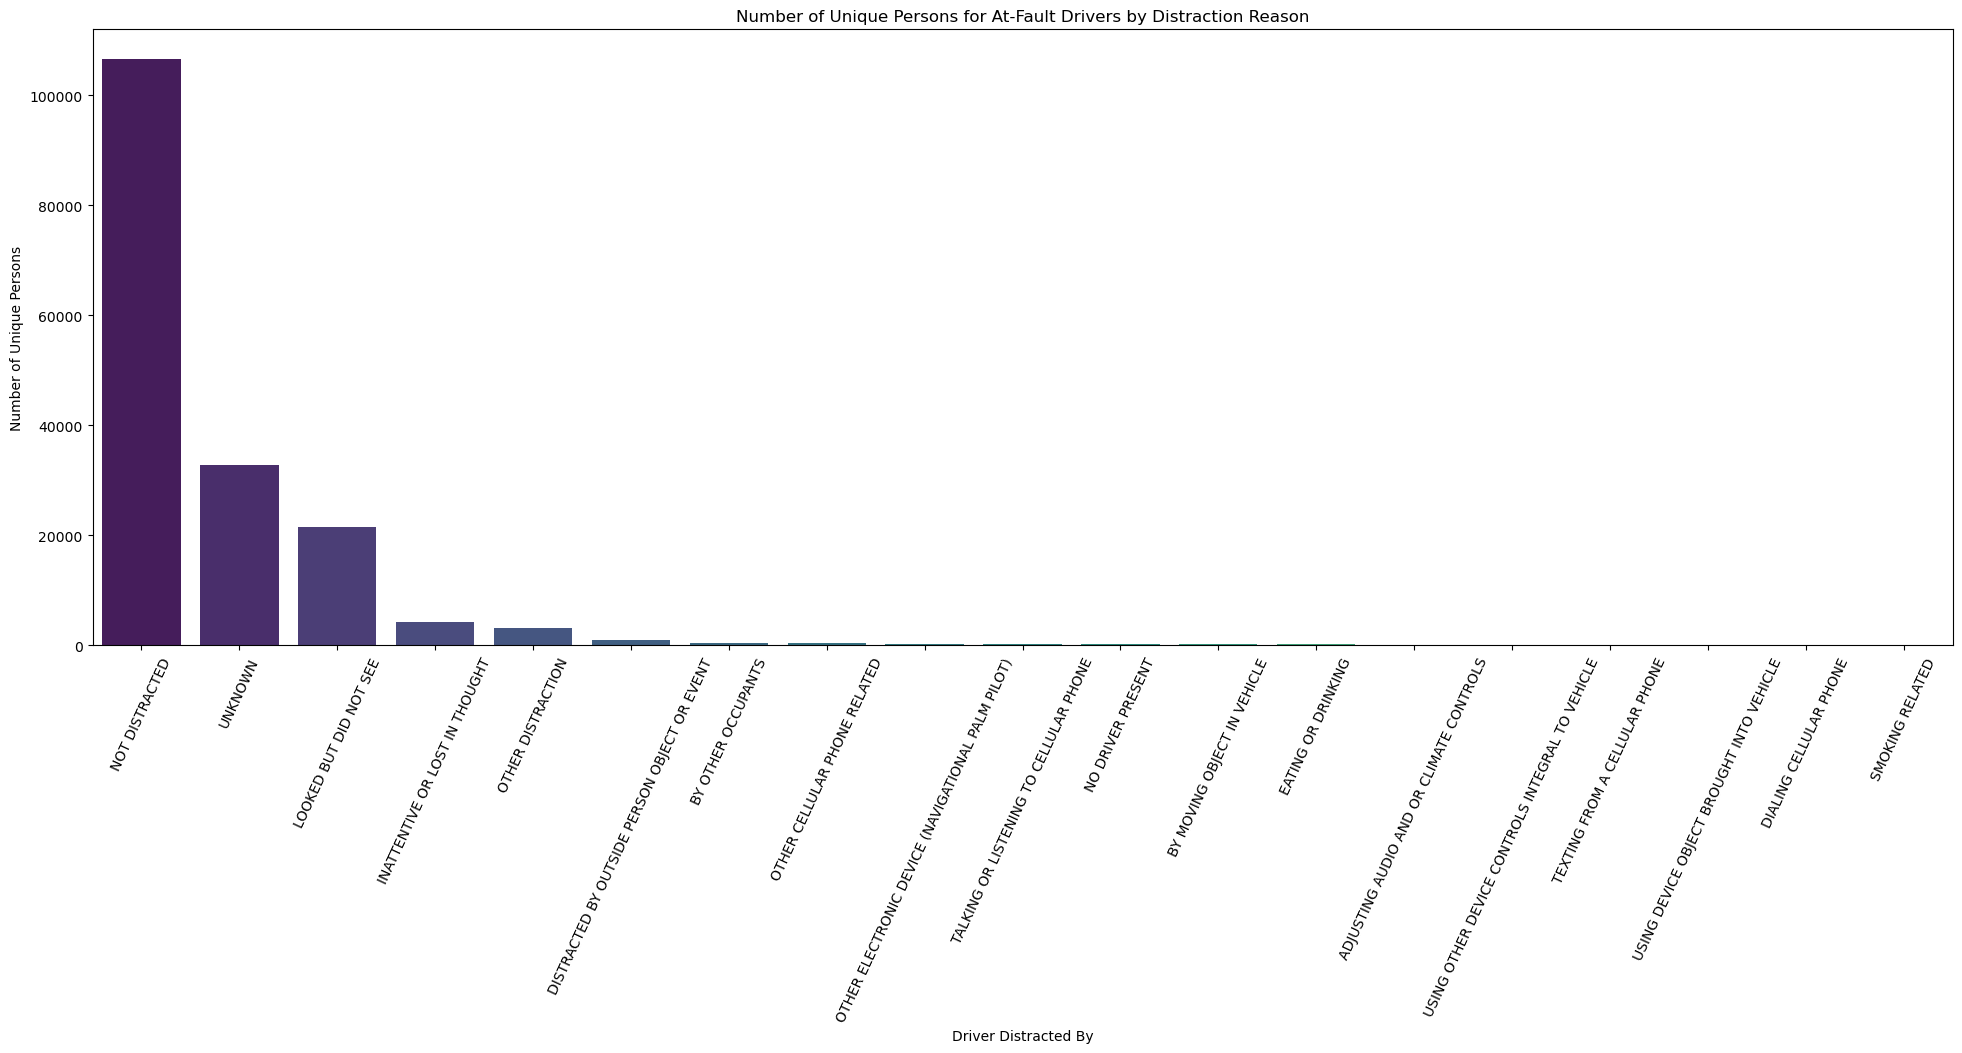

In [50]:
to_visualize = df.groupby('Driver Distracted By')['Person ID'].agg(['nunique']).sort_values(by='nunique', ascending=False)


to_visualize = to_visualize.reset_index()


plt.figure(figsize=(24, 8))
sns.barplot(x='Driver Distracted By', y='nunique', data=to_visualize, palette='viridis')
plt.title('Number of Unique Persons for At-Fault Drivers by Distraction Reason')
plt.xlabel('Driver Distracted By')
plt.ylabel('Number of Unique Persons')
plt.xticks(rotation=65)
plt.show()

## Vehicle Analysis:

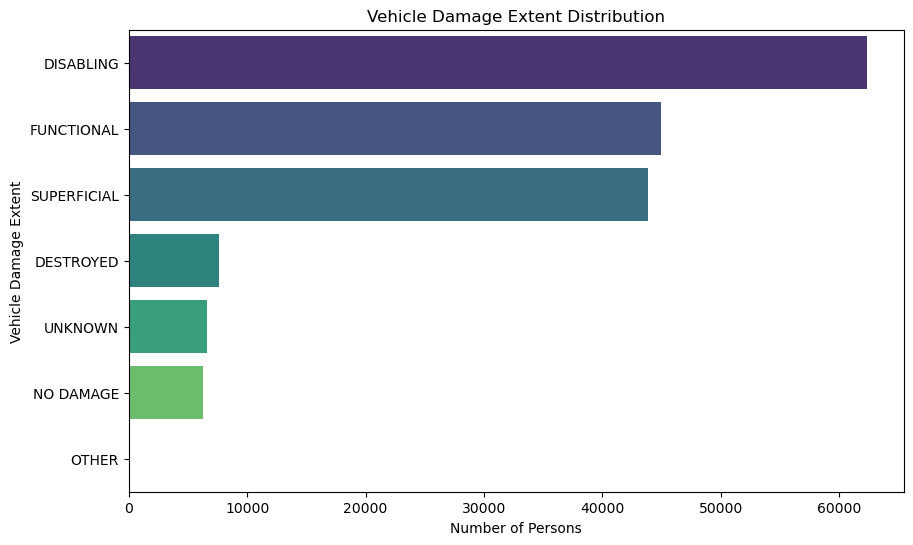

In [51]:
to_visualize = df.groupby('Vehicle Damage Extent')['Person ID'].agg(['nunique']).sort_values('nunique', ascending=False)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a horizontal bar chart
sns.barplot(x='nunique', y=to_visualize.index, data=to_visualize, palette='viridis')

plt.title('Vehicle Damage Extent Distribution')
plt.xlabel('Number of Persons')
plt.ylabel('Vehicle Damage Extent')
plt.show()

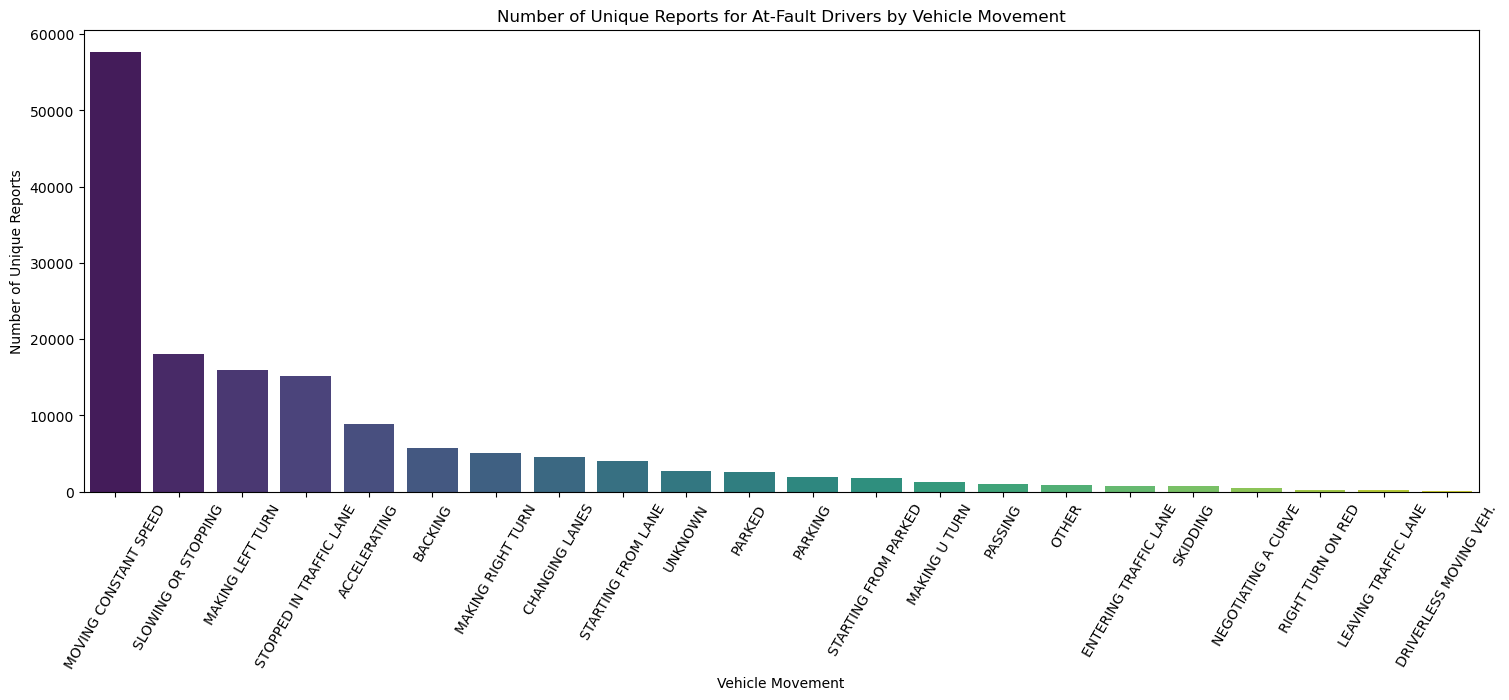

In [52]:
to_visualize = df.groupby('Vehicle Movement')['Report Number'].agg(['nunique']).sort_values('nunique', ascending=False)

to_visualize = to_visualize.reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(x='Vehicle Movement', y='nunique', data=to_visualize, palette='viridis')
plt.title('Number of Unique Reports for At-Fault Drivers by Vehicle Movement')
plt.xlabel('Vehicle Movement')
plt.ylabel('Number of Unique Reports')
plt.xticks(rotation=60)
plt.show()

## Vehicle Details

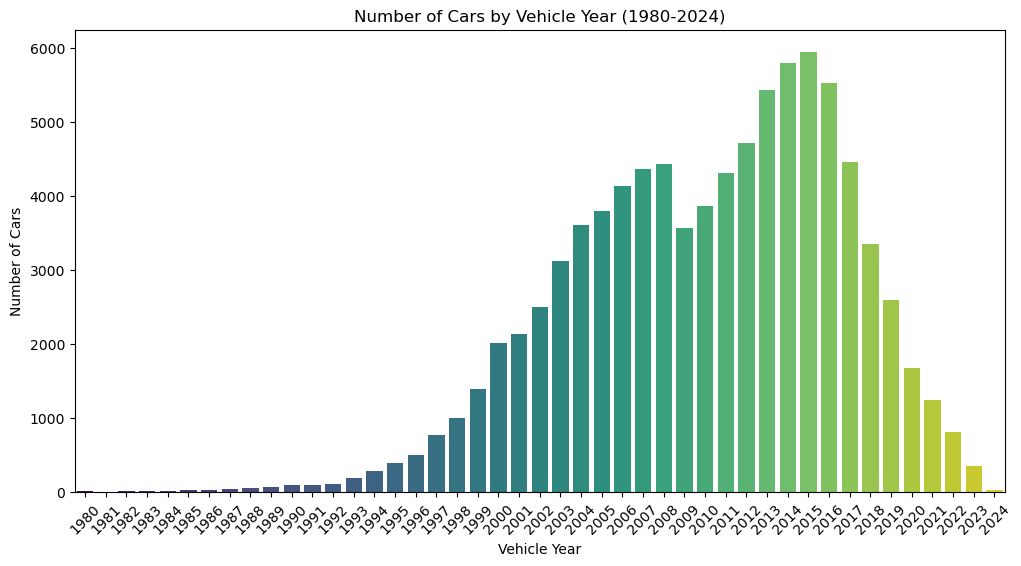

In [28]:
to_visualize = df[(df['Vehicle Year'] >= 1980) & (df['Vehicle Year'] <= 2024) & (df['Driver At Fault']=='Yes')].groupby('Vehicle Year')['Vehicle ID'].agg(['nunique']).rename(columns={'nunique': 'Number of cars'})

to_visualize = to_visualize.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle Year', y='Number of cars', data=to_visualize, palette='viridis')
plt.title('Number of Cars by Vehicle Year (1980-2024)')
plt.xlabel('Vehicle Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

In [54]:
df.groupby('Vehicle Make')['Vehicle ID'].agg(['nunique']).sort_values('nunique', ascending=False)

,nunique
Vehicle Make,
TOYOTA,23156
HONDA,18860
FORD,17132
TOYT,8833
NISSAN,8521
...,...
HYUUD,1
HYUNVAL2008,1
HYUNVAL1999,1


## Injury Analysis

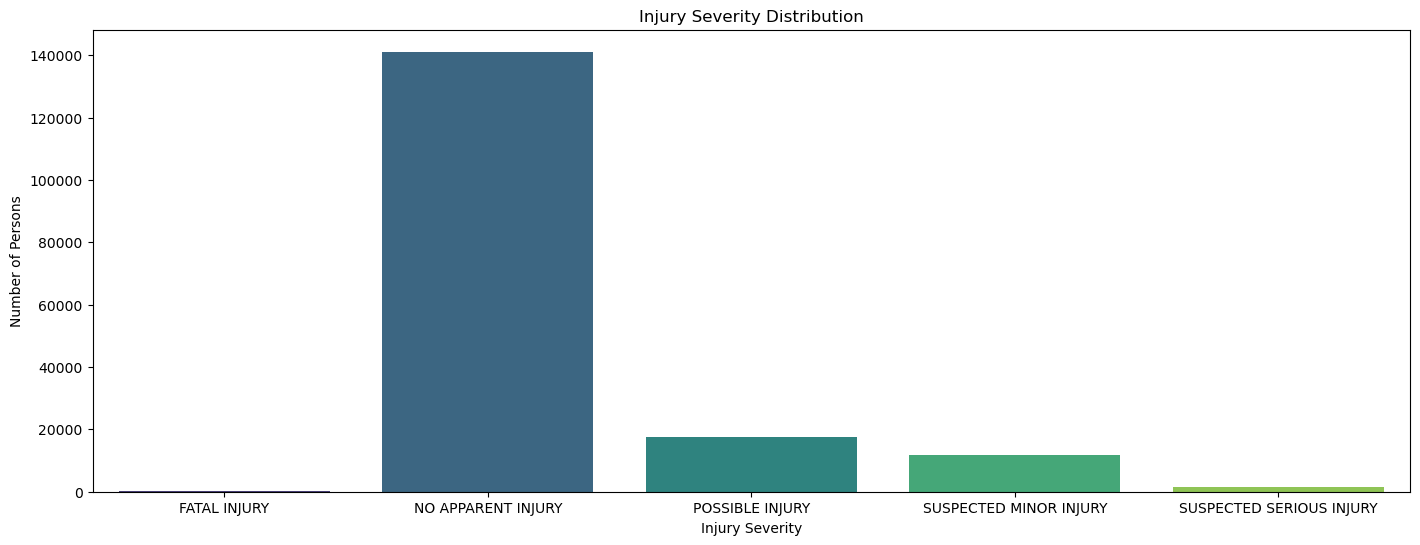

In [55]:
to_visualize = df.groupby('Injury Severity')['Person ID'].agg(['nunique'])

to_visualize = to_visualize.reset_index()


plt.figure(figsize=(17, 6))
sns.barplot(x='Injury Severity', y='nunique', data=to_visualize, order=to_visualize['Injury Severity'], palette='viridis')
plt.title('Injury Severity Distribution')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Persons')
plt.show()

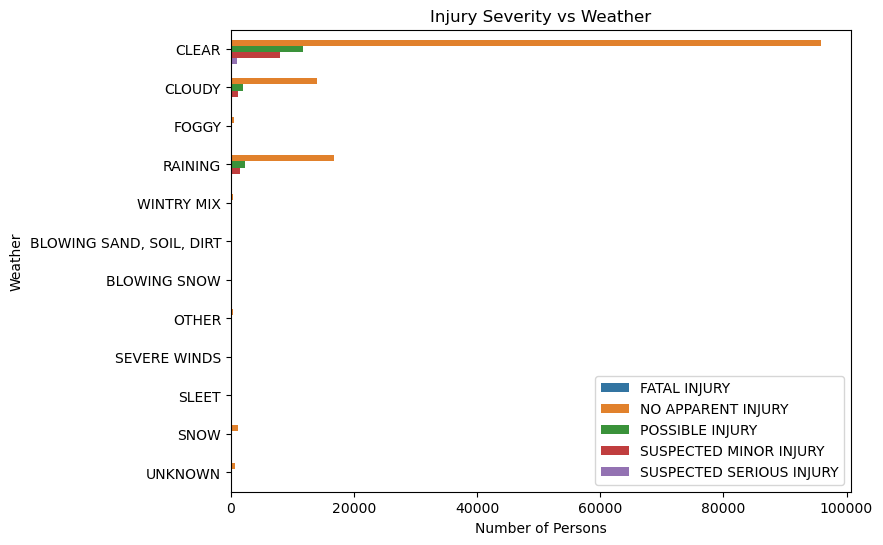

In [56]:
to_visualize = df.groupby(['Injury Severity', 'Weather'])['Person ID'].agg(['nunique'])

to_visualize = to_visualize.reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='nunique', y='Weather', hue='Injury Severity', data=to_visualize, orient='h')
ax.legend(loc='lower right')
plt.title('Injury Severity vs Weather')
plt.xlabel('Number of Persons')
plt.ylabel('Weather')
plt.show()

# Data Cleaning

In [57]:
mean_fill    = np.mean(df['Vehicle Year'][((df['Vehicle Year'] >= 1984) & (df['Vehicle Year'] <= 2024))])

df.loc[((df['Vehicle Year'] < 1984) | (df['Vehicle Year'] > 2024)), 'Vehicle Year']  = mean_fill

In [58]:
df['Crash Date/Time Length'] = df['Crash Date/Time'].apply(len)

In [59]:
df['Crash Date/Time Length'].nunique()

1

In [60]:
from datetime import datetime

def format_date(date_string):
    dt_object = datetime.strptime(date_string, '%m/%d/%Y %I:%M:%S %p')
    return dt_object.strftime('%m/%d/%Y %H:%M:%S')

In [61]:
df['Crash Date/Time'] = df['Crash Date/Time'].apply(format_date)

In [62]:
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [63]:
df['Day Name'] = df['Crash Date/Time'].dt.day_name()
df['Day']      = df['Crash Date/Time'].dt.day
df['Month Name'] = df['Crash Date/Time'].dt.month_name()
df['Year'] = df['Crash Date/Time'].dt.year
df['Hour'] = df['Crash Date/Time'].dt.hour
df['Minute'] = df['Crash Date/Time'].dt.minute

In [64]:
df.drop('Crash Date/Time Length',axis=1)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Cross-Street Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Day Name,Day,Month Name,Year,Hour,Minute
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,2019-05-31 15:00:00,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004.0,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)",Friday,31,May,2019,15,0
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,2023-07-21 17:59:00,Maryland (State),Unknown,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,E7058A8E-4F18-4D2A-954E-04A099CFED12,No,NO APPARENT INJURY,NOT DISTRACTED,MD,1C3C3E2F-9A23-4ED0-9BB3-B6C370D99C37,DISABLING,THREE OCLOCK,TWO OCLOCK,PASSENGER CAR,MAKING LEFT TURN,East,South,40,No,No,2011.0,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)",Friday,21,July,2023,17,59
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,2023-07-20 15:10:00,Maryland (State),Maryland (State),STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,2B404D6D-8DB5-4CB6-9E71-9F1B8D0A8925,Yes,NO APPARENT INJURY,NOT DISTRACTED,MD,0483CE47-E0FC-4BCA-BAB0-B7541820FEE6,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PICKUP TRUCK,ACCELERATING,North,North,35,No,No,2019.0,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)",Thursday,20,July,2023,15,10
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,2023-07-23 12:10:00,County,County,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,637D8107-0381-4B8D-848A-B4A93B4D53CE,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,MD,4406AA84-07F8-45F4-88A2-09AD89AC9AAF,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,STARTING FROM LANE,East,East,40,No,No,2016.0,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)",Sunday,23,July,2023,12,10
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,2023-07-24 06:10:00,County,County,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,52F904CB-822C-4D8D-9457-0D66B99AD407,Yes,NO APPARENT INJURY,NOT DISTRACTED,CA,148FAA0F-4EBB-43E8-9339-BBED3F245751,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,West,North,35,No,No,2016.0,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)",Monday,24,July,2023,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171999,DM8338000C,16010228,Takoma Park Police Depart,Property Damage Crash,2016-03-01 10:01:00,Municipality,Municipality,OTHER,CLEAR,DRY,DAYLIGHT,NaN,NaN,BA80DDDE-3324-407D-9FB3-1836FCAAE2C6,No,NO APPARENT INJURY,NOT DISTRACTED,MD,81DAD2F7-8D4A-4316-B40D-FAD4A4587B28,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,POLICE VEHICLE/EMERGENCY,SLOWING OR STOPPING,East,East,25,No,No,2016.0,FORD,EXPLORER,NO MISUSE,38.972560,-76.997466,"(38.97255976, -76.99746609)",Tuesday,1,March,2016,10,1
172000,MCP1182001S,170519976,Montgomery County Police,Property Damage Crash,2017-07-19 14:22:00,County,Maryland (State),SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NaN,7C147700-DF4B-4343-AA96-2056FFC1A588,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,VA,DF427BFB-94E2-454E-9C46-82C8E286B992,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER

# Data Saving

In [65]:
df.to_csv('crush_data_v1.csv', index=False)